In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/home/eduardo/Documentos/project-data/melb_data.csv')

In [4]:
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [5]:
TOTAL_max = data.loc[data['Price'].idxmax()]
Total_min = data.loc[data['Price'].idxmin()]
print(TOTAL_max)

Suburb                             Mulgrave
Address                         35 Bevis St
Rooms                                     3
Type                                      h
Price                             9000000.0
Method                                   PI
SellerG                                Hall
Date                             29/07/2017
Distance                               18.8
Postcode                             3170.0
Bedroom2                                3.0
Bathroom                                1.0
Car                                     1.0
Landsize                              744.0
BuildingArea                          117.0
YearBuilt                            1960.0
CouncilArea                          Monash
Lattitude                         -37.93168
Longtitude                        145.16126
Regionname       South-Eastern Metropolitan
Propertycount                        7113.0
Name: 12094, dtype: object


In [6]:
# analisar quanto a vaga de carro influencia no preço da casa 
Car = data[data['Car']==0.0] # filtrar apenas linhas de casas sem vaga de carro 

In [7]:
maximo = Car.loc[Car['Price'].idxmax()]
minimo = Car.loc[Car['Price'].idxmin()]
print(minimo)
#A casa mais cara só tem uma vaga de carro e mais baixa não tem vaga 
#ou seja a vaga influencia mais não muito no aumento ou não do preço mas vamos analisar a media!

Suburb                      Footscray
Address              202/51 Gordon St
Rooms                               1
Type                                u
Price                         85000.0
Method                             PI
SellerG                       Burnham
Date                        3/09/2016
Distance                          6.4
Postcode                       3011.0
Bedroom2                          1.0
Bathroom                          1.0
Car                               0.0
Landsize                          0.0
BuildingArea                      NaN
YearBuilt                      2007.0
CouncilArea               Maribyrnong
Lattitude                    -37.7911
Longtitude                     144.89
Regionname       Western Metropolitan
Propertycount                  7570.0
Name: 2652, dtype: object


In [8]:
Car1 = data[data['Car']!=0.0]

In [9]:
coluna = data['Regionname'].unique()
print(coluna)

['Northern Metropolitan' 'Western Metropolitan' 'Southern Metropolitan'
 'Eastern Metropolitan' 'South-Eastern Metropolitan' 'Eastern Victoria'
 'Northern Victoria' 'Western Victoria']


In [10]:
media = Car['Price'].mean()
print(media)
media2 = Car1['Price'].mean()
mediacar = Car1['Car'].mean()
print(media2)
print(mediacar)
#bom esta concluido que a vaga de carro não tem uma influencia tão significativa no preço das casas e esta provado com as media !

1079088.0107212476
1075405.8865700176
1.7423150816522575


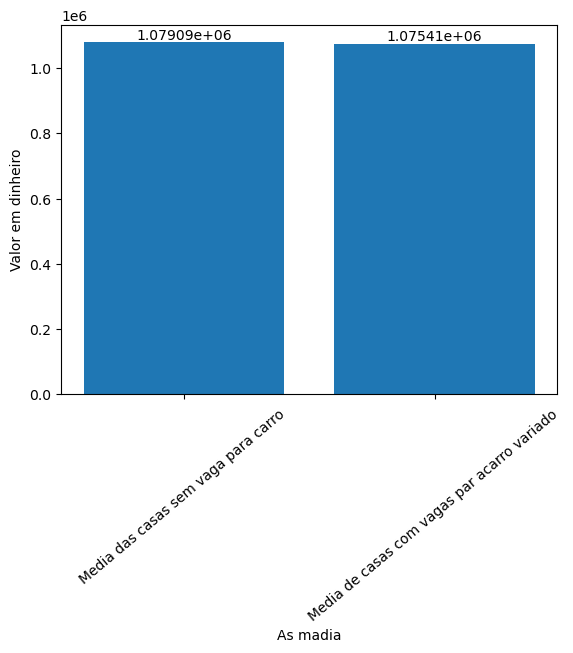

In [11]:
D1, D2 = plt.subplots()
Ed = D2.bar(['Media das casas sem vaga para carro ', 'Media de casas com vagas par acarro variado '],[media, media2])
D2.bar_label(Ed)
plt.xlabel('As madia')
plt.ylabel('Valor em dinheiro')
plt.xticks(rotation=40)
plt.show()
#e o grafico mostra que não há muita diferença entre elas ou seja não muda muito significativamente a presença de vagas de carro

In [12]:
#agora vou analisar como a região influencia
regiao1 = data[data['Regionname']=='South-Eastern Metropolitan']
regiao2 = data[data['Regionname']=='Northern Metropolitan']
regiao3 = data[data['Regionname']=='Western Metropolitan']
regiao4 = data[data['Regionname']=='Eastern Metropolitan']
regiao5 = data[data['Regionname']=='Southern Metropolitan']
regiao6 = data[data['Regionname']=='Eastern Victoria']
regiao7 = data[data['Regionname']=='Northern Victoria']
regiao8 = data[data['Regionname']=='Western Victoria']

In [13]:
mean = regiao1['Price'].mean()
print(mean)
mean1 = regiao2['Price'].mean()
print(mean1)
mean2 = regiao3['Price'].mean()
print(mean2)
mean3 = regiao4['Price'].mean()
print(mean3)
mean4 = regiao5['Price'].mean()
print(mean4)
mean5 = regiao6['Price'].mean()
print(mean5)
mean6 = regiao7['Price'].mean()
print(mean6)
mean7 = regiao8['Price'].mean()
print(mean7)

922943.7844444445
898171.0822622108
866420.5200135686
1104079.6342624065
1372963.3693290735
699980.7924528302
594829.268292683
397523.4375


In [31]:
Nv= regiao1['Price'].count()
Nv1 = regiao2['Price'].count()
Nv2 = regiao3['Price'].count()
NV3 = regiao4['Price'].count()
Nv4 = regiao5['Price'].count()
NV5 = regiao6['Price'].count()
NV6 = regiao7['Price'].count()
NV7 = regiao8['Price'].count()
print(Nv,Nv1,Nv2,NV3,Nv4,NV5,NV6,NV7)

450 3890 2948 1471 4695 53 41 32


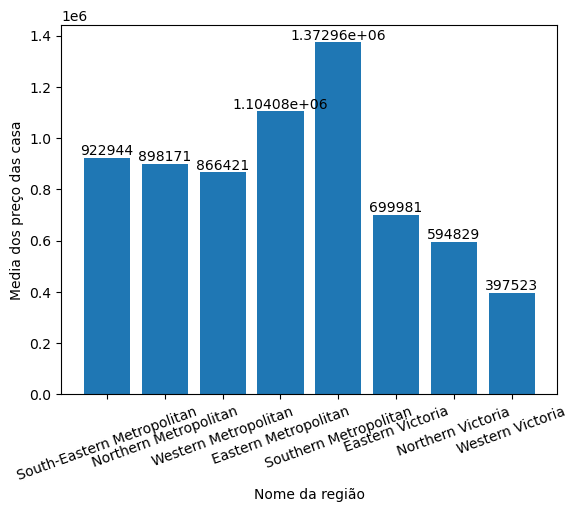

In [14]:
ED1 , ED2 = plt.subplots()
EDe = ED2.bar(['South-Eastern Metropolitan','Northern Metropolitan','Western Metropolitan','Eastern Metropolitan'
              ,'Southern Metropolitan','Eastern Victoria','Northern Victoria','Western Victoria'],[mean,mean1,mean2,mean3,mean4,mean5,mean6,mean7])
ED2.bar_label(EDe)
plt.xlabel('Nome da região')
plt.ylabel('Media dos preço das casa')
plt.xticks(rotation=20)
plt.show()

In [24]:
data2 = data['Rooms'].unique()
print(data2)
dados3 = data[data['Rooms']==1]
dados4 = data[data['Rooms']==2]

[ 2  3  4  1  6  5  8  7 10]


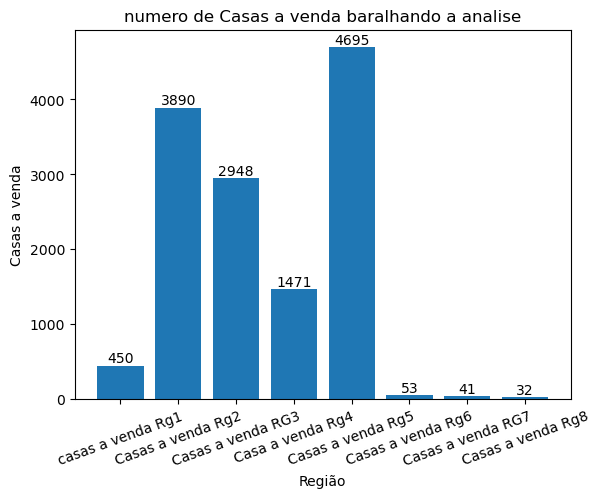

In [35]:
EDUA ,EDU = plt.subplots()
ERA = EDU.bar(['casas a venda Rg1','Casas a venda Rg2','Casas a venda RG3','Casa a venda Rg4',
              'Casas a venda Rg5','Casas a venda Rg6','Casas a venda RG7','Casas a venda Rg8'],[Nv,Nv1,Nv2,NV3,Nv4,NV5,NV6,NV7])
plt.xticks(rotation=20)
EDU.bar_label(ERA)
plt.xlabel('Região')
plt.ylabel('Casas a venda')
plt.title('numero de Casas a venda baralhando a analise')
plt.show()